# =============== DATA PREPARATION====================

Agenda:
    
   1. What is Scikit-Learn! 
   2. Hands on Scikit-Learn
   3. Train /Test Split
   4. Cross Validation
   5. Evaluation Metrics
   6. Featura Transformation (Normalisation)
   7. Feature Vectorization

## In Practice

In [3]:
import sklearn


import sklearn as sk


In [4]:
#usual way of importing a model 

from sklearn.linear_model import LinearRegression

In [5]:
#importation of datasets


In [6]:
from sklearn.datasets import load_iris

In [7]:
#importation of ML Models


In [8]:
#importation of evaluation metrics


# Supervised Learning 

Remember what supervised learning is?

### Classification of species of flowers

Just a dataset consisting of:

1. **3 different species of irises’** (Setosa, Versicolor, and Virginica) 
2. **4 attributes** on each flower (petal and sepal length, petal width, sepal width)
3. **150 observations** (50 observations of each of the three types)

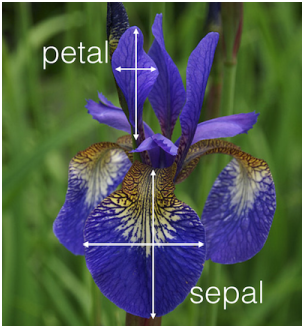

In [19]:
from IPython.display import Image
Image('img/SEPAL_PETAL.png')

In [20]:
import pandas as pd

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()

In [23]:
# A bit about it
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [24]:
X = iris.data  #feature matrix
y = iris.target #response vector

In [25]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [26]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
df['y'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
df['label'] = df.y.map({ 0:'setosa',  1: 'versicolor' ,  2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [31]:
df.sample(8)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y,label
132,6.4,2.8,5.6,2.2,2,virginica
75,6.6,3.0,4.4,1.4,1,versicolor
55,5.7,2.8,4.5,1.3,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
21,5.1,3.7,1.5,0.4,0,setosa
145,6.7,3.0,5.2,2.3,2,virginica
46,5.1,3.8,1.6,0.2,0,setosa
26,5.0,3.4,1.6,0.4,0,setosa


In [32]:
#let's visualize it a bit
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

/home/rockefeller/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39e50daac8>,
      dtype=object)

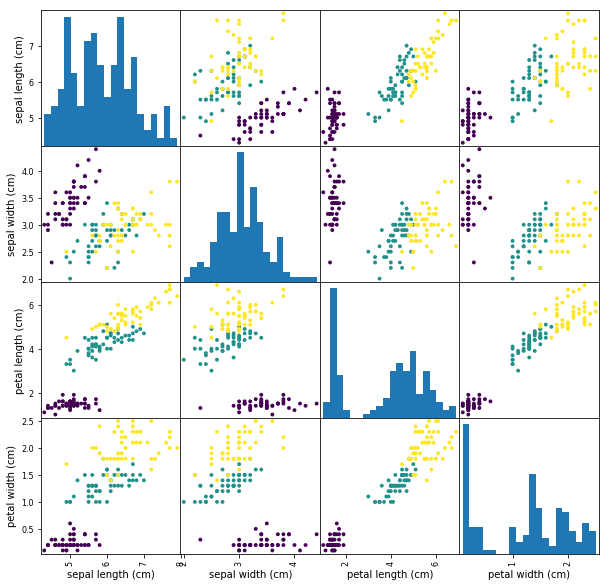

In [33]:
pd.scatter_matrix(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']] , hist_kwds={'bins':20} , 
                  c = df['y'] , s = 60 , alpha = 5  , figsize=(10,10))

**"Features"** are also known as predictors, inputs, or attributes. The **"response"** is also known as the target, label, or output.

**"Observations"** are also known as samples, instances, or records.

In [34]:
#importing the model
from sklearn.neighbors import KNeighborsClassifier

In [35]:
#instantiating the model
knn = KNeighborsClassifier( n_neighbors=2)


In [36]:
#knn?

In [37]:
#fitting the model with the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

When it comes to **making a prediction**, the new observation must have the **same features as the training observations**.

In [38]:
#making prediction on unseen data
knn.predict_proba([ [100,200,400,500]  ]  )

array([[0., 0., 1.]])

In [39]:
knn.predict([[1.5  , 0.74 , 3.5  , 4.12]])

array([1])

In [40]:
knn.predict_proba([[1.5  , 0.74 , 5  , 4.12]])

array([[0., 0., 1.]])

Too simple , right??

# 2. Train Test Split 

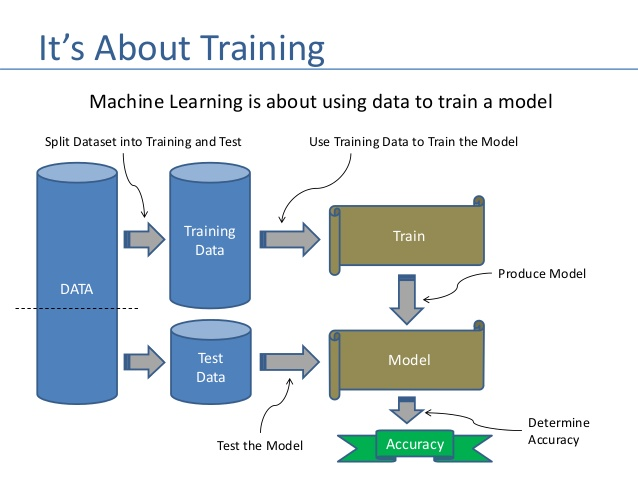

In [41]:
Image('img/ttsplit.jpg')

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42, 
                                                    test_size =0.15)

In [44]:
print(X_train.shape)
print(X_test.shape)

(127, 4)
(23, 4)


In [45]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [46]:
y_pred  = knn.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0])

In [47]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0])

In [48]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0])

# 3.  Cross Validation

**K-folod Cross validation** is a widely used resampling method. In cross validation a dataset is divided into **k folds**. Each fold contains $\frac{1}{k}$ cases and is created by **Bernoulli random sampling** of the full data set. A computation is performed on $k-1$ folds of the full dataset. The $k^{th}$ fold is **held back** and is used for testing the result. The computation is performed $k$ times and model parameters are averaged (mean taken) over the results of the $k$ folds. For each iteration, $k-1$ folds are used for training and the $k^{th}$ fold is used for testing. 

4-fold cross validation is illustrated in the figure below. To ensure the data are randomly sampled the data is randomly shuffled at the start of the procedure. The random samples can then be efficiently sub-sampled as shown in the figure. The model is trained and tested four times. For each iteration the data is trained with three folds of the data and tested with the fold shown in the dark shading. 


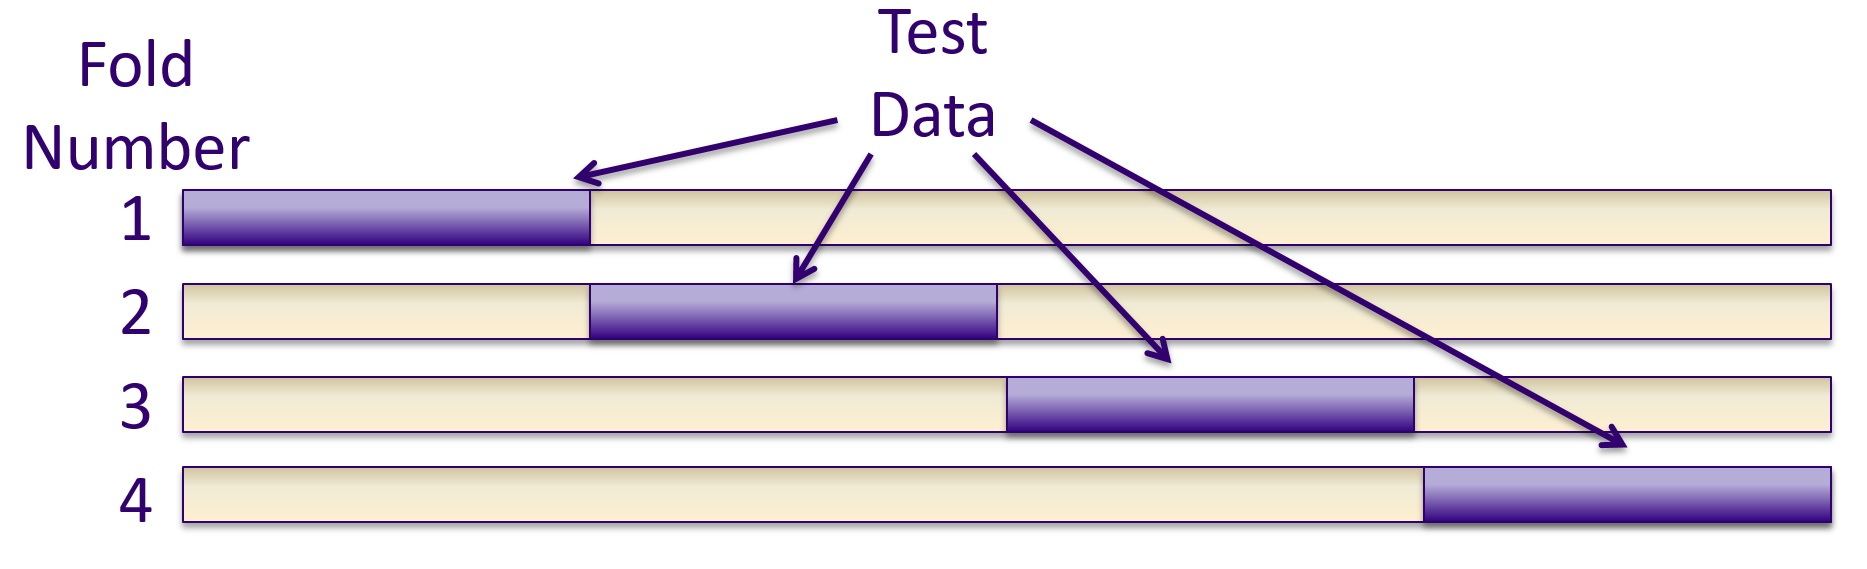

In [50]:
Image('img/CrossValidation.jpg')

In [51]:
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as ms

### Example 1:

In [52]:
from sklearn.model_selection import cross_val_score
log_reg = LogisticRegression() 

scores = cross_val_score(log_reg, X, y, cv=5)
scores   

/home/rockefeller/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rockefeller/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/rockefeller/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rockefeller/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/rockefeller/.local/lib/python3.6/site-packages/sklearn/linea

array([1.        , 0.96666667, 0.93333333, 0.9       , 1.        ])

In [54]:
from sklearn import metrics

In [55]:
metrics.confusion_matrix(y_test , y_pred)

array([[8, 0, 0],
       [0, 9, 0],
       [0, 0, 6]])

### Example 2:

In [65]:
df2 = pd.read_csv('data/chip_sauce.csv' )
df2.head(10)

,lon,lat,sauce
0,0.079734,0.020187,1
1,0.925780,3.907218,2
2,0.559460,1.015901,1
3,1.494941,0.195371,1
4,1.155097,4.842423,2
5,9.289873,2.789329,1
6,2.128989,3.969253,2
7,0.917987,4.389250,2
8,6.540491,1.248623,2
9,0.253165,1.340259,1


In [66]:
from sklearn.model_selection import cross_validate


In [67]:
#specify your metrics of evaluation performance
eval_list = ['precision_macro', 'recall_macro', 'accuracy']

In [68]:

#out of all cases classified with that label value
scores1 = cross_validate(knn, 
                         df2[['lon' , 'lat']], df2['sauce'] ,
                         scoring=eval_list, 
                         cv=3)

In [69]:
scores1

/home/rockefeller/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_precision_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/rockefeller/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_recall_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/rockefeller/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00620008, 0.00678897, 0.00627041]),
 'score_time': array([0.02166629, 0.01960564, 0.01905775]),
 'test_precision_macro': array([0.85020023, 0.84231893, 0.84440928]),
 'train_precision_macro': array([0.92694805, 0.92833876, 0.92172524]),
 'test_recall_macro': array([0.84351852, 0.82887205, 0.83231552]),
 'train_recall_macro': array([0.91666667, 0.91851852, 0.90925926]),
 'test_accuracy': array([0.84269663, 0.82771536, 0.83082707]),
 'train_accuracy': array([0.91557223, 0.91744841, 0.9082397 ])}

# 4. Evaluation Metrics

**Accuracy**

The accuracy is the fraction of cases correctly classified.

$$Accuracy = \frac{TP+TN}{TP+FP+TN+FN}$$
 

**Precision**

Precision is the fraction of correctly classified label cases out of all cases classified with that label value.

$$Precision = \frac{TP}{TP+FP}$$



**Recall**  

Recall is the fraction of cases of a label value correctly classified out of all cases that actually have that label value. 

$$Recall = \frac{TP}{TP + FN}$$


**F1**

The F1 statistic is weighted average of precision and recall. 

$$F1 = 2 * \frac{precision * recall}{precision + recall}$$

In other words, F1 is a weighted metric for overall model performance.



**The Confusion Matrix**



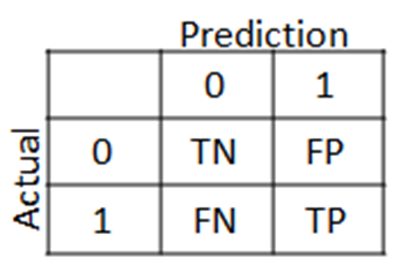

In [71]:
Image('img/ConfMat.png')

In [72]:
df2.head()

,lon,lat,sauce
0,0.079734,0.020187,1
1,0.925780,3.907218,2
2,0.559460,1.015901,1
3,1.494941,0.195371,1
4,1.155097,4.842423,2


In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
log_Reg = LogisticRegression()


In [76]:
X_train, X_test, y_train, y_test = train_test_split(df2[["lon" , "lat"]], df2.sauce,
                                                    random_state=42, 
                                                    test_size =0.15)

In [77]:
log_Reg.fit(X_train , y_train)

/home/rockefeller/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
y_pred = log_Reg.predict(X_test)
y_pred

array([2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 2])

In [79]:
from sklearn import metrics

In [80]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [81]:
metrics.accuracy_score(y_test , y_pred)

0.6583333333333333

In [82]:
metrics.confusion_matrix(y_test , y_pred)

array([[39, 21],
       [20, 40]])

In [83]:
metrics.precision_score(y_test , y_pred)

0.6610169491525424

In [84]:
metrics.recall_score(y_test , y_pred)

0.65

In [85]:
metrics.f1_score(y_test , y_pred)

0.6554621848739496

In [86]:
import numpy as np
import pylab as pl
import matplotlib
from matplotlib.colors import ListedColormap

#clf = LinearSVC(C=0.001  , random_state=31, tol=1e-5)

def plot_classification_results(clf, X, y, title):
    # Divide dataset into training and testing parts
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

    # Fit the data with classifier.
    clf.fit(X_train, y_train)

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    h = .02  # step size in the mesh
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure(figsize=(10,10))
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)

    y_predicted = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    pl.scatter(X_test[:, 0], X_test[:, 1], c=y_predicted, alpha=0.5, cmap=cmap_bold)
    pl.xlim(xx.min(), xx.max())
    pl.ylim(yy.min(), yy.max())
    pl.title(title)
    return score

In [87]:
df2.columns

Index(['lon', 'lat', 'sauce'], dtype='object')

0.8446969696969697

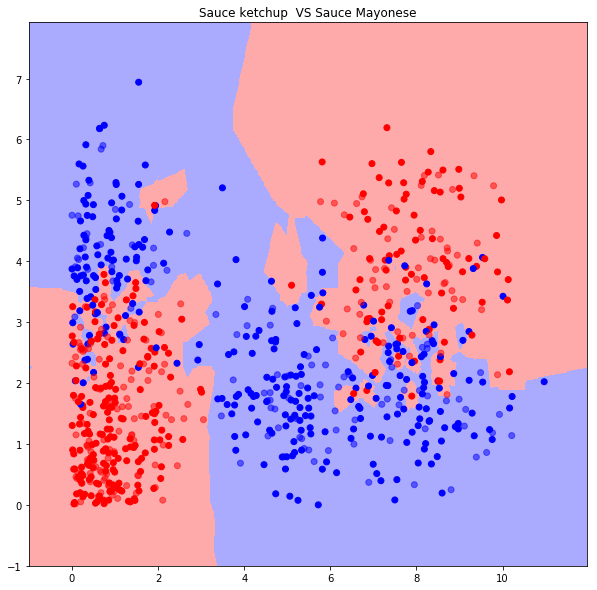

In [88]:
plot_classification_results(knn , np.array(df2[['lon' , 'lat']]) , np.array(df2['sauce']) , "Sauce ketchup  VS Sauce Mayonese")

# 5. Feature Transformation

### a. Feature Scaling

In [89]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder , MinMaxScaler  , LabelEncoder

## ==>  Standard Scaler

The standard score of a sample `x` is calculated as:

  $$z = \frac{(x - u)}{s}$$

In [90]:

scaler = StandardScaler().fit(X[ :, :2])  #scale sepal length (cm)	sepal width (cm)

In [91]:
scaler.transform(X[ :, :2])

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

## ==> MinMaxScaler

The standard score of a sample `X_scaled` is calculated as:

In [92]:


scaler2 = MinMaxScaler(feature_range=(0,1)).fit(X[ :, :2] )

In [93]:
scaler2.transform(X[ :, :2])

array([[0.22222222, 0.625     ],
       [0.16666667, 0.41666667],
       [0.11111111, 0.5       ],
       [0.08333333, 0.45833333],
       [0.19444444, 0.66666667],
       [0.30555556, 0.79166667],
       [0.08333333, 0.58333333],
       [0.19444444, 0.58333333],
       [0.02777778, 0.375     ],
       [0.16666667, 0.45833333],
       [0.30555556, 0.70833333],
       [0.13888889, 0.58333333],
       [0.13888889, 0.41666667],
       [0.        , 0.41666667],
       [0.41666667, 0.83333333],
       [0.38888889, 1.        ],
       [0.30555556, 0.79166667],
       [0.22222222, 0.625     ],
       [0.38888889, 0.75      ],
       [0.22222222, 0.75      ],
       [0.30555556, 0.58333333],
       [0.22222222, 0.70833333],
       [0.08333333, 0.66666667],
       [0.22222222, 0.54166667],
       [0.13888889, 0.58333333],
       [0.19444444, 0.41666667],
       [0.19444444, 0.58333333],
       [0.25      , 0.625     ],
       [0.25      , 0.58333333],
       [0.11111111, 0.5       ],
       [0.

$$X\_std = \frac{X - X.min}{X.max - X.min}$$

$$X\_scaled = X\_std * (max - min) + min$$  

where **min** and **max** are the feature range

### b. Feature Vectorization

### ==> Label Encoding


In [94]:
lab = LabelEncoder().fit(df['label'])

In [95]:
lab.transform(df['label'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [96]:
import numpy as np

In [97]:
df1 = pd.DataFrame()
df1['age'] = np.random.randint(35 , 60 , 4)
df1['job'] = ['lawyer' , 'doctor' , 'scientist' , 'engineer']
df1['gender'] = ['F' , 'M' , 'M' , 'F']

In [98]:
df1

,age,job,gender
0,56,lawyer,F
1,55,doctor,M
2,53,scientist,M
3,45,engineer,F


In [99]:
#One hot encode the "job" column
pd.get_dummies(df1['job'])

,doctor,engineer,lawyer,scientist
0,0,0,1,0
1,1,0,0,0
2,0,0,0,1
3,0,1,0,0


In [100]:
enc = pd.get_dummies(df1[['job' , 'gender']])
enc

,job_doctor,job_engineer,job_lawyer,job_scientist,gender_F,gender_M
0,0,0,1,0,1,0
1,1,0,0,0,0,1
2,0,0,0,1,0,1
3,0,1,0,0,1,0


In [101]:
enc['age'] = df1['age']
enc

,job_doctor,job_engineer,job_lawyer,job_scientist,gender_F,gender_M,age
0,0,0,1,0,1,0,56
1,1,0,0,0,0,1,55
2,0,0,0,1,0,1,53
3,0,1,0,0,1,0,45
